In [1]:
%cd ..

/Users/brewer/Code/Eric/ericrobertbrewer/python


# resume_timeline

Adapted from StackOverflow: [Timeline bar graph using python and matplotlib](https://stackoverflow.com/questions/51505291/timeline-bar-graph-using-python-and-matplotlib)

In [2]:
import datetime as dt

from matplotlib import dates as mdates
from matplotlib import font_manager
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.lines import Line2D

In [3]:
FONT_PATH = '/Users/brewer/Library/Fonts/'
FONT_NAME = 'Droid Serif'

for font in font_manager.findSystemFonts(fontpaths=FONT_PATH, fontext='ttf'):
    font_manager.fontManager.addfont(font)

font_manager.findfont(FONT_NAME)

'/Users/brewer/Library/Fonts/DroidSerif-Regular.ttf'

In [4]:
CATEGORY_WORK = 'Work'
CATEGORY_SCHOOL = 'Education'
CATEGORY_VOLUNTEER = 'Volunteer'
CATEGORIES = [CATEGORY_VOLUNTEER, CATEGORY_SCHOOL, CATEGORY_WORK]
CATEGORY_TO_INDEX = {c: i for i, c in enumerate(CATEGORIES)}
CATEGORY_TO_COLOR = {c: 'C{:d}'.format(i) for i, c in enumerate(CATEGORIES)}

items = [
    (dt.date(2008,  9,  4), dt.date(2012,  5, 12), 'BS @ SSU', CATEGORY_SCHOOL),
    (dt.date(2012,  4, 16), dt.date(2013,  8, 11), 'Carmel', CATEGORY_WORK),
    (dt.date(2013,  9, 25), dt.date(2015,  9,  9), 'Mission', CATEGORY_VOLUNTEER),
    (dt.date(2016,  2,  2), dt.date(2016,  7, 18), 'Gaia', CATEGORY_WORK),
    (dt.date(2016,  8, 10), dt.date(2017, 12, 20), 'Autonet', CATEGORY_WORK),
    (dt.date(2017,  9,  4), dt.date(2020,  6, 18), 'MS @ BYU', CATEGORY_SCHOOL),
    (dt.date(2019, 11, 11), dt.date(2022,  8,  9), 'FamilySearch', CATEGORY_WORK),
    (dt.date(2022,  8, 25), dt.date(2023,  5, 22), 'PhD', CATEGORY_SCHOOL)
]

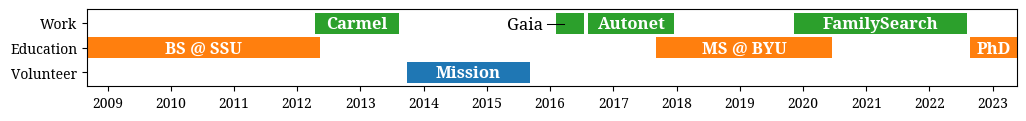

In [5]:
polygons = list()
colors = list()
for item in items:
    y = CATEGORY_TO_INDEX[item[3]] + 1
    polygons.append((
        (mdates.date2num(item[0]), y - 0.425),
        (mdates.date2num(item[1]), y - 0.425),
        (mdates.date2num(item[1]), y + 0.425),
        (mdates.date2num(item[0]), y + 0.425)
    ))
    colors.append(CATEGORY_TO_COLOR[item[3]])

bars = PolyCollection(polygons, closed=True, facecolors=colors)

fig, ax = plt.subplots(figsize=(12, 1))
ax.add_collection(bars)
ax.autoscale()

locator = mdates.YearLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontname=FONT_NAME)
ax.set_xlim(left=polygons[0][0][0], right=polygons[-1][1][0])

ax.set_yticks(list(range(1, 4)))
ax.set_yticklabels(CATEGORIES, fontname=FONT_NAME)

fontdict = {'color': 'white', 'fontfamily': FONT_NAME, 'fontsize': 12, 'fontweight': 'bold'}
for i, item in enumerate(items):
    polygon = polygons[i]
    if i == 3:
        x = polygon[0][0] - 75
        y = CATEGORY_TO_INDEX[item[3]] + 0.95
        gaia_fontdict = {'color': 'black', 'fontfamily': FONT_NAME, 'fontsize': 12, 'fontweight': 'normal'}
        ax.text(x, y, item[2], fontdict=gaia_fontdict, ha='right', va='center')
        ax.add_line(Line2D((x + 25, x + 125), (y, y), linewidth=0.75, color='black'))
    else:
        x = (polygon[0][0] + polygon[1][0]) / 2
        y = CATEGORY_TO_INDEX[item[3]] + 0.95
        ax.text(x, y, item[2], fontdict=fontdict, ha='center', va='center')

plt.show()